<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 9th exercise: <font color="#C70039">Interpretable Machine Learning by means of Partial Dependence (PDP) and Individual Conditional Expectation (ICE) Plots</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Rubaiya Kabir Pranti</a>
* Matriculation Number: <a href="https://www.gernotheisenberg.de/"> 11146364</a>
* Date:   16.01.2024

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_003.png" style="float: center;" width="800">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

---------------------------------

### <font color="ce33ff">DESCRIPTION</font>:

Partial dependence plots (PDP) and individual conditional expectation (ICE) plots can be used to visualize and analyze the interaction between the target response and a set of input features of interest.
Both PDPs [H2009] and ICEs [G2015] assume that the input features of interest are independent from the complement features and this assumption is often violated in practice. Thus, in the case of correlated features, we will create absurd data points to compute the PDP/ICE.

[H2009]
T. Hastie, R. Tibshirani and J. Friedman, The Elements of Statistical Learning, Second Edition, Section 10.13.2, Springer, 2009.

[G2015]
A. Goldstein, A. Kapelner, J. Bleich, and E. Pitkin, “Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation” Journal of Computational and Graphical Statistics, 24(1): 44-65, Springer, 2015.

---------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * try to follow the interpretations by printing out the decision tree and look for the feature patterns that the PDPs indicate.

**PART I**<br>
4. download an interesting data set from Kaggle and do the preprocessing.<br>
5. change the classifier according to the data set. The more blackbox the better.<br>
6. use PDP to identify the most relevant features explaining the target response of the data set.<br>
7. comment your entire code and your findings.<br>  

**PART II**<br>
8. use the data set and the classifer from steps 4 and 5<br>
9. plot ICE curves with parameter (kind='both')<br>
10. comment your entire code and your findings.<br>  

---------------------------------

# <font color="ce33ff">PART I (Partial Dependence Plots)</font>

## Imports
Import all necessary python utilities.

In [1]:
#make sure you take these packages (in colab too)
#!pip install matplotlib==3.1.1 scikit-learn==0.23.1 PDPbox==0.2.1

In [2]:
!pip install --upgrade pdpbox scikit-learn

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
from pdpbox import pdp, get_example, info_plots

import warnings
warnings.filterwarnings('ignore')

In [4]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

## Load data set

In [5]:
#data = pd.read_csv('C:/Users/rubai/AML/data/FIFA/FIFA.Statistics.2018.csv')
data = pd.read_csv('C:/Users/rubai/AML/my_datasets/not_normal/diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
# all features are:
print(data.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## Preprocessing


In [8]:
data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
# Convert from string “Yes”/”No” to binary
y = (data['Outcome'])

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]] #BMI, DiabetesPedigreeFunction columns will be removed
# it selects only those columns from data that contain integer data

x = data[feature_names]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,6,148,72,35,0,50,1
1,1,85,66,29,0,31,0
2,8,183,64,0,0,32,1
3,1,89,66,23,94,21,0
4,0,137,40,35,168,33,1
...,...,...,...,...,...,...,...
763,10,101,76,48,180,63,0
764,2,122,70,27,0,27,0
765,5,121,72,23,112,30,0
766,1,126,60,0,0,47,1


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Training the decision  tree classifier

Starting with a simple decision tree model.
<font color=red>Note:</font> The calculation of a partial dependence can happen obviously, only after a model has been trained.

In [11]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x, train_y)

## Partial Dependence Plots (PDP)
## use PDP to identify the most relevant features explaining the target response of the data set.
#### read the API reference guide for further possibilities
https://pdpbox.readthedocs.io/en/latest/PDPIsolate.html#pdpbox.pdp.PDPIsolate

A few things are worth to be pointed out for interpreting this plot.

The y-axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.

From this particular graph you can interpret, that scoring one goal substantially increases the chances of winning "Man of The Match."
But extra goals beyond that show little to no impact on predictions.

In [12]:
# the pdp data to be plotted
pdp_goals = pdp.PDPIsolate(model=tree_model, df=val_x, model_features=feature_names, feature='Pregnancies', feature_name='Pregnancies for women')

# plotting the PDP for feature 'Pregnancies'
fig, axes = pdp_goals.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

The y-axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.

From this particular graph, we can conclude that the pdp plot is very simple. Even if the weeks for pregnancies increase, it has no impact or show little to no impact on pdp predictions.

In [13]:
# the pdp data to be plotted
pdp_goals = pdp.PDPIsolate(model=tree_model, df=val_x, model_features=feature_names, feature='BloodPressure', feature_name='Value for BloodPressure')

# plotting the PDP for feature 'BloodPressure'
fig, axes = pdp_goals.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

From this particular graph, we can conclude that the pdp plot is again very simple for the dataset. Even if pressure increases, it has no impact or little to no impact on pdp predictions.

In [14]:
# the pdp data to be plotted
pdp_dist = pdp.PDPIsolate(model=tree_model, df=val_x, model_features=feature_names, feature='Age', feature_name='Age for all')

# plot the PDP for feature 'Age'
fig, axes = pdp_dist.plot(
    center=False,
    plot_lines=True, #
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True}, #
    engine='plotly', #
    template='plotly_white') #

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

## <font color="FFC300">Comments</font>:
#### - y-axis represents the partial dependance/average predicted outcome, across all the data points when the Pregnancies for women, Age for all, Value for BloodPressure are set to a specific value. x-axis represents the range of values for the feature Value for BloodPressure.
#### -  the yellow line represents the partial dependence function outputs through this plot which is relatively flattened. This refers that changes in the pregnencies, age, blood pressure values do not have a strong influence on the predicted outcomes of the model.
#### - red dashed line at y=0 represents a reference value for the prediction
#### - the vertical short lines at the bottom represent the distribution of the feature values in the dataset

In this PDP plot you will see the ticks on the x-axis as depicting the real data samples.

This PDP plot seems to be too simple to represent reality.
Maybe that's because the model is so simple. Print the decision tree to compare that finding to the decision tree structure.
For the purpose of
Let's back up our theory and do the same plot with a Random Forest model.

# Using Random forest classifier

In [15]:
# creating a new model: Random Forest classifier
rf_model = RandomForestClassifier(random_state=0).fit(train_x, train_y)

In [16]:
# the pdp data to be plotted
pdp_goals = pdp.PDPIsolate(model=rf_model, df=val_x, model_features=feature_names, feature='Pregnancies', feature_name='Pregnancies for women')

# plotting the PDP for feature Pregnancies
fig, axes = pdp_goals.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

In [17]:
# the pdp data to be plotted
pdp_goals = pdp.PDPIsolate(model=rf_model, df=val_x, model_features=feature_names, feature='BloodPressure', feature_name='Value for BloodPressure')

# plotting the PDP for feature 'BloodPressure'
fig, axes = pdp_goals.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

In [18]:
# the pdp data to be plotted
pdp_dist = pdp.PDPIsolate(model=rf_model, df=val_x, model_features=feature_names, feature='Age', feature_name='Age for all')

# plot the PDP for feature 'Age'
fig, axes = pdp_dist.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

## <font color="FFC300">Comments (from above plots)</font>:
#### - using random forest classifier, first pregnancies plot shows that the prediction does not change much for most values of "Pregnancies for women" since the yellow line is relatively flat with only a slight peak.
#### - the blood pressure plot shows that the prediction does not change much for most values of "Value for BloodPressure" except there is a slight downgrade while the blood pressure value is changed to 80.
#### - the age plot shows that the prediction does change much for some values of "Age for all" but these are not significant changes for example, when age is increased to 30, then we can explain that there is slightly higher probability to get diabetes still it is very tough to interpret
#### - still using random forest classifier, results are not yet plausible 

# Using Gradient boosting classifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=0).fit(train_x, train_y)

In [20]:
# the pdp data to be plotted
pdp_goals = pdp.PDPIsolate(model=gb_model, df=val_x, model_features=feature_names, feature='Pregnancies', feature_name='Pregnancies for women')

# plotting the PDP for feature 'BloodPressure'
fig, axes = pdp_goals.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

In [21]:
# the pdp data to be plotted
pdp_goals = pdp.PDPIsolate(model=gb_model, df=val_x, model_features=feature_names, feature='BloodPressure', feature_name='Value for BloodPressure')

# plotting the PDP for feature 'BloodPressure'
fig, axes = pdp_goals.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
# the pdp data to be plotted
pdp_dist = pdp.PDPIsolate(model=gb_model, df=val_x, model_features=feature_names, feature='Age', feature_name='Age for all')

# plot the PDP for feature 'Age'
fig, axes = pdp_dist.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white')

fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

## <font color="FFC300">Comments (from above plots)</font>:

#### - after using gradient boosting classifier, results are not yet smooth and interpretable where we could say that one or some certain values for age, pressure or pregnancies can affect or show strong influence on predicted output. 

## 2D Partial Depedence Plot (for two features)

Now, plotting the PDP for two features can be done by using the **pdp_interact** and **pdp_interact_plot** functions.

First, switch back to the simple decision tree model.

In [23]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x, train_y)

## Decision tree for two features

In [24]:
# Similar to previous PDP plot.
# However, use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot

# plot PDP for the two features
features_to_plot = ['BloodPressure', 'Age']

pdp_goal_distance = pdp.PDPInteract(model=tree_model, df=val_x, model_features=feature_names, features=features_to_plot, feature_names=["Value for BloodPressure", "Age for all"])

fig, axes = pdp_goal_distance.plot(
    plot_type="grid",
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white'
)
fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

## <font color="FFC300">Comments</font>:
#### - The numbers in each cell of the grid represent the average predicted outcome (probability of having diabetes), when the model is fed with these specific feature values which are combination of "Value for BloodPressure" and "Age" percentile bins. If it is high probabibilty near 1, means he/she has diabetes.
#### - The one and only color in the grid and the constant number (0.359) across all cells indicate that the interaction between  BloodPressure and Age does not have a significant impact on the predictions( by the model for this particular range of values).So, changes in blood pressure and age together do not seem to change the predicted outcome!



If you feel motivated to tweak the chart this tutorial ressource might be of value:
https://github.com/SauceCat/PDPbox/blob/master/tutorials/pdpbox_binary_classification.ipynb

## Gradient boosting for two features

In [25]:
# Similar to previous PDP plot.
# However, use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot

# plot PDP for the two features
features_to_plot = ['BloodPressure', 'Age']

pdp_goal_distance = pdp.PDPInteract(model=gb_model, df=val_x, model_features=feature_names, features=features_to_plot, feature_names=["Value for BloodPressure", "Age for all"])

fig, axes = pdp_goal_distance.plot(
    plot_type="grid",
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white'
)
fig.show()

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

## <font color="FFC300">Comments</font>:
#### - similar result like above

# <font color="ce33ff">PART II (Individual Conditional Expectation)</font>

ICE is also a model-agnostic method that can be applied to any model.
In fact, it is basically the same concept as PDP but is different in that it displays the marginal effect of feature(s)
for each instance instead of calculating the average effect in a overall data context as the PDP does.
Thus, it can understood as the equivalent to a PDP for individual data instances.
Visually, an ICE plot displays the dependence of the prediction on a feature for each instance separately,
resulting in one line per instance.

There are multiple packages and libraries that can be used to compute ICE plots.

The PartialDependenceDisplay function in the sklearn.inspection module, the PyCEBox package and H2O package’s ice_plot function are available.

Let’s take a look at an example in Sklearn’s documentation (https://scikit-learn.org/stable/modules/partial_dependence.html).

## Imports
Import all necessary python utilities.

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay

# ICE plot

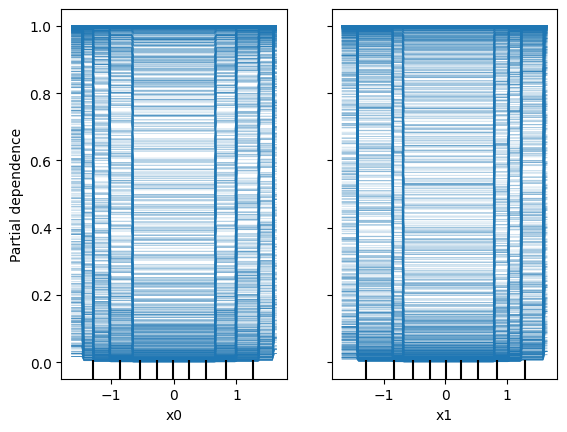

In [27]:
# Read some inbuild data set as part of the Sklearn data sets being offered
# To get more information on the data set please refer to
''' https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html '''

x, y = make_hastie_10_2(random_state=0) # set a seed with random_state

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x, y)
features = [0, 1] #features x and y

PartialDependenceDisplay.from_estimator(clf, x, features, kind='individual')

## <font color="FFC300">Comments</font>:
#### - each line represents one instance or example or one row of data from the dataset, showing how its prediction changes with changes in the feature values (blood pressure and age for example). 
#### - two ICE plots show many vertical overlaps between lines which refer that for most instances, the predictions are relatively stable across the changes in feature values and the features do not have a strong individual effect on the predictions.
#### - the uniformity across the feature range suggests that the predictions are not sensitive to these feature values.

It is evident that, similar to PDPs, ICE curves can be computed only after a model has been trained.

If you specify the parameter kind='both', then a PDP and an ICE curve is plotted in one canvas at the same time.
This will be meaningful when looking at both, the marginal average effect and marginal individual effects at once!

# Both PDP and ICE plots in one canvas

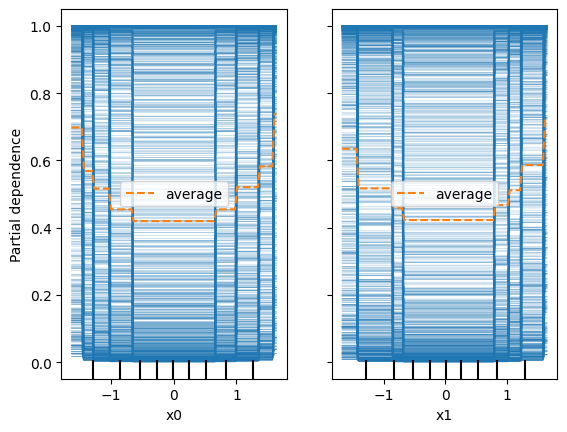

In [28]:
PartialDependenceDisplay.from_estimator(clf, x, features, kind='both')

## <font color="FFC300">Comments</font>:
#### -  both PDP and ICE plots are plotted
#### - The blue lines in both plots represent ICE curves for individual observations which visulizes how each single observation changes as the value of the feature (age...) changes
#### - PDP is the average of all the ICE curves at each feature value which shows the average effect of the feature on the prediction
#### - In both of the plots, the PDP shows that around the center where the feature value is 0, then the average prediction decreases for the center value of the feature and then again increases as the feature value moves towards the highest ones
#### -  for PDP's clariry and smooth behavior, PDP plot above the ICE plot really helps for interpretation purpose, but ICE plots can reveal variations among all instances and interactions 